In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
mall = pd.read_csv('Mall_Customers.csv')

In [4]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
cluster_data = mall[[ 'Annual Income (k$)', 'Spending Score (1-100)']]
cluster_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [38]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)

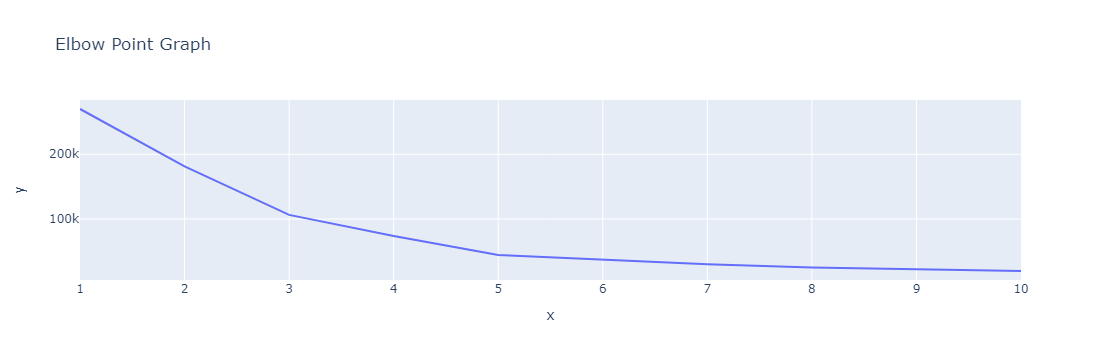

In [39]:
px.line(x = range(1,11), y = wcss, title = 'Elbow Point Graph')

In [47]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster = kmeans.fit_predict(cluster_data)
print(cluster)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [48]:
mall['Cluster'] = kmeans.labels_

In [49]:
mall['Cluster2'] = cluster

In [50]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster2
0,1,Male,19,15,39,2,2
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,2,2


In [51]:
score = silhouette_score(cluster_data,mall['Cluster2'])
print(f' Silhouette Score : {score}')

 Silhouette Score : 0.553931997444648


In [ ]:
px.scatter(cluster_data,x = 'Age', y ='Annual Income (k$)', hue = mall['Cluster2'])

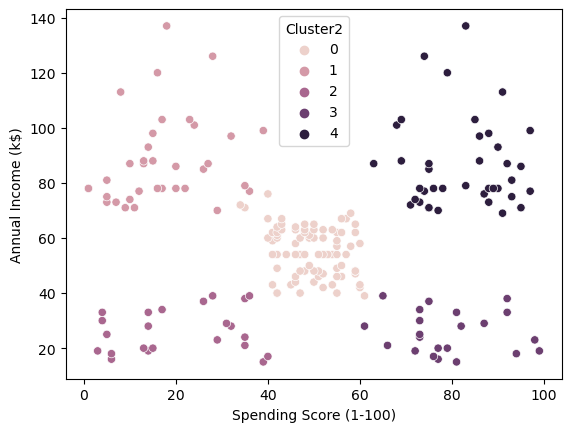

In [52]:
sns.scatterplot(data = cluster_data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = mall['Cluster2'])
plt.show()

In [62]:
cluster_summary = mall.groupby('Cluster2').agg({
    'Age' : ['mean', 'median'],
    'Spending Score (1-100)' : ['mean', 'median'],
    'Annual Income (k$)' : ['mean', 'median'],
    'Gender' : lambda x: x.mode()[0]
})
cluster_summary

Age        Spending Score (1-100)        Annual Income (k$)  \
               mean median                   mean median               mean   
Cluster2                                                                      
0         42.716049   46.0              49.518519   50.0          55.296296   
1         41.114286   42.0              17.114286   16.0          88.200000   
2         45.217391   46.0              20.913043   17.0          26.304348   
3         25.272727   23.5              79.363636   77.0          25.727273   
4         32.692308   32.0              82.128205   83.0          86.538462   

                  Gender  
         median <lambda>  
Cluster2                  
0          54.0   Female  
1          85.0     Male  
2          25.0   Female  
3          24.5   Female  
4          79.0   Female